# **Data Mining Week 12 Class Practice**
### **Rayna Shera Chang / 0706022310022**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed

## **Load Dataset**

In [68]:
# Load dataset
data = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv"
df = pd.read_csv(data)

# Preview the dataset
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [69]:
# Check shape of the dataset
df.shape

(300, 16)

In [70]:
df.dtypes

,0
student_id,int64
name,object
age,int64
gender,object
quiz1_marks,float64
quiz2_marks,float64
quiz3_marks,float64
total_assignments,int64
assignments_submitted,float64
midterm_marks,float64


In [71]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [72]:
# View the statistical summary of numerical variables
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


## **Data Cleaning**

In [73]:
# Check for missing values in dataset
df.isnull().sum()

,0
student_id,0
name,0
age,0
gender,0
quiz1_marks,0
quiz2_marks,0
quiz3_marks,0
total_assignments,0
assignments_submitted,300
midterm_marks,0


In [74]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended


In [75]:
# show unique values from column
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'student_id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [76]:
columns_to_drop = ['student_id', 'name', 'total_assignments','assignments_submitted','total_lectures','total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


## **Encoding**

In [78]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'gender' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'gender' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


0: Female

1: Male

##**Exploratory Data Analysis**

In [79]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


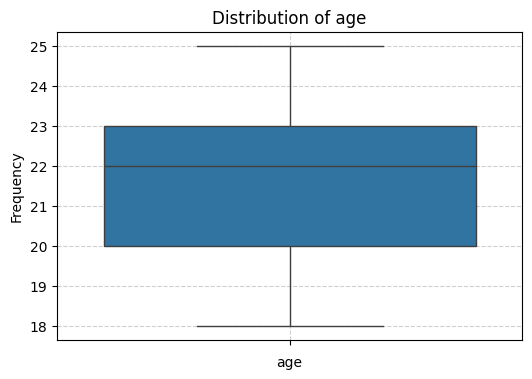

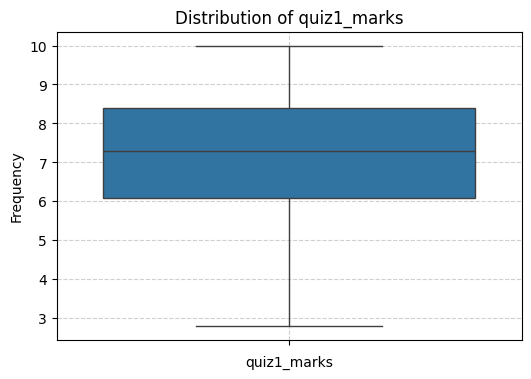

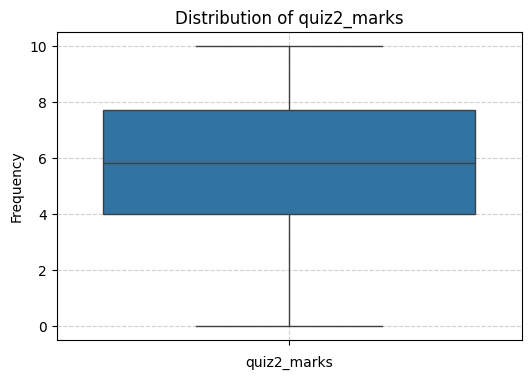

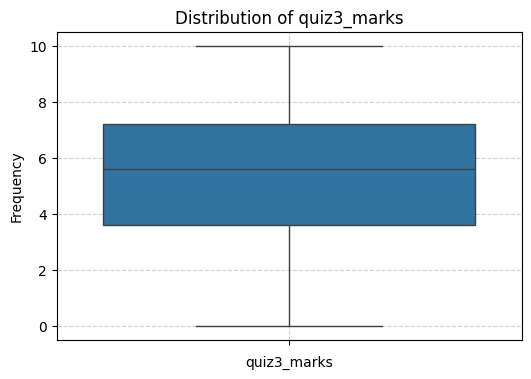

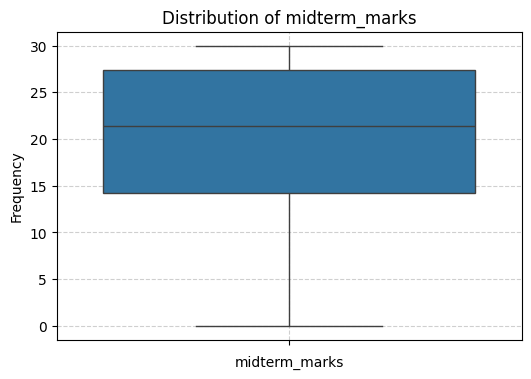

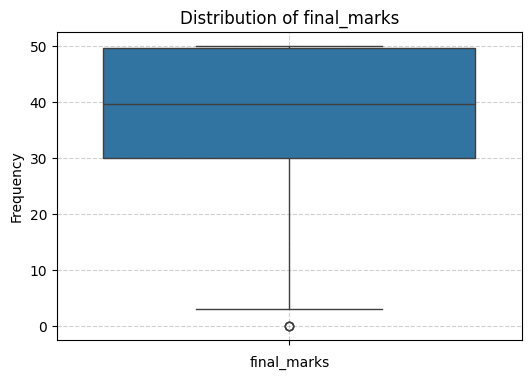

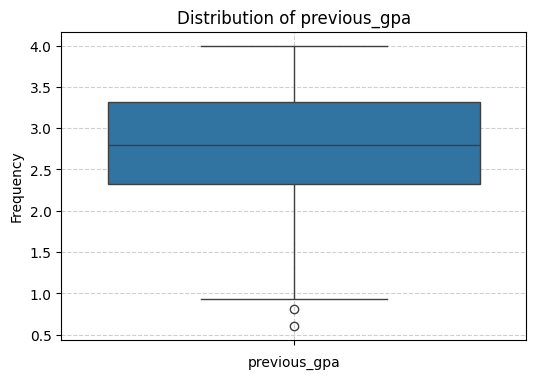

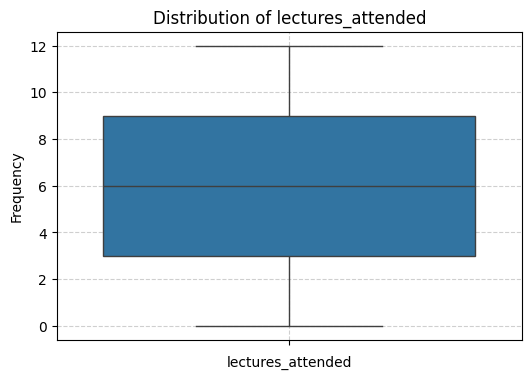

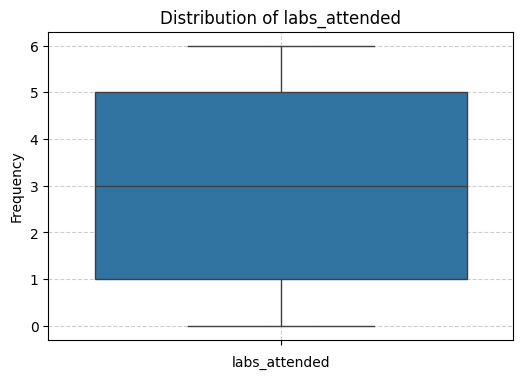

In [80]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

**Box Plot Distribution of Final Marks**
* There are very low outliers, including scores close to 0–5, suggesting severe underperformance for some students.
* Majority of students score in the 30–50 range, showing generally good performance.
* The distribution appears right-skewed because most scores are relatively high.

**Box Plot Distribution of Previous GPA**
* The distribution is mostly centered around 2.5–3.5, indicating typical GPA values.
* A few lower GPA outliers (below 1) indicate a small group of historically weak students.
* The pattern suggests most students enter the course with moderate academic backgrounds.

### **Correlation Heatmap of Key Performance Variables**

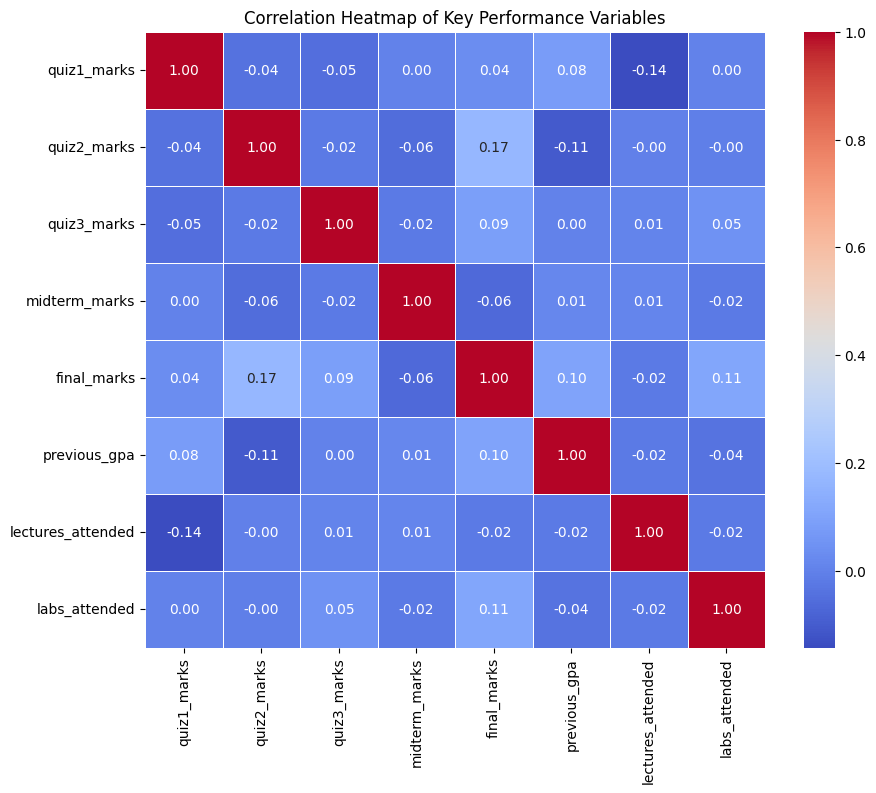

In [81]:
# Define the key performance variables
performance_vars = [
    'quiz1_marks', 'quiz2_marks', 'quiz3_marks',
    'midterm_marks', 'final_marks', 'previous_gpa',
    'lectures_attended', 'labs_attended'
]

# Select the relevant columns from df_encoded
df_performance = df_encoded[performance_vars]

# Calculate the correlation matrix
correlation_matrix = df_performance.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Performance Variables')
plt.show()

Interpretation:

The correlation heatmap shows that most performance variables—quizzes, midterm, final exam, and GPA—have **very weak correlations** with each other, meaning no single assessment strongly predicts another. Final marks show only a **slight positive relationship** with quiz2 and quiz3, suggesting that consistent engagement in quizzes may provide a small advantage, but not a strong one. Attendance (lectures or labs) also shows **almost no correlation** with academic performance, indicating that merely attending sessions does not guarantee better grades, possibly due to low engagement quality, passive participation, or ineffective study habits. Overall, the pattern suggests that students’ performance is influenced by **multiple independent factors**, highlighting the need for more holistic academic support—such as improving learning strategies, formative feedback, and personalized intervention—rather than relying solely on attendance or individual exams.

### **Scatter Plot: previous_gpa vs final_marks colored by lecture_attendance**

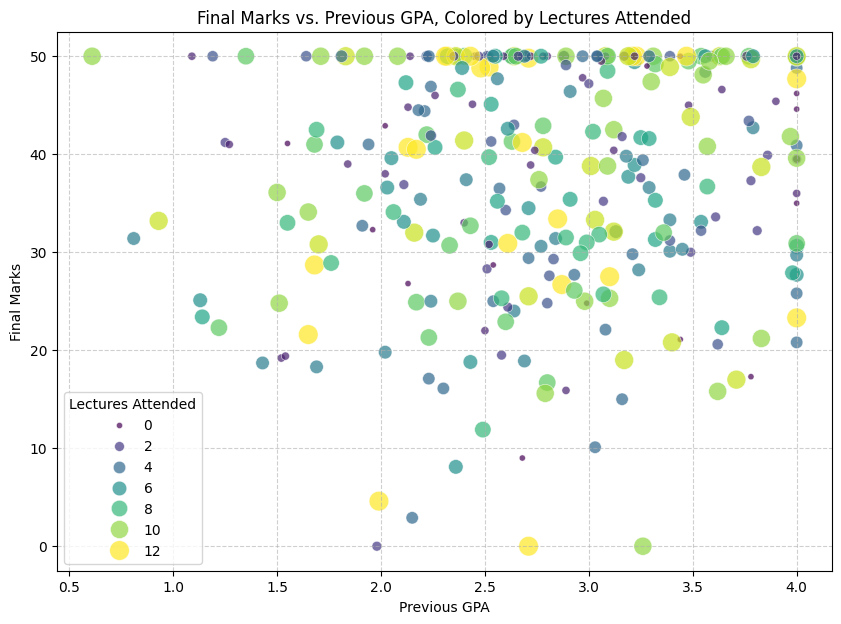

In [82]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_encoded,
    x='previous_gpa',
    y='final_marks',
    hue='lectures_attended',
    palette='viridis',
    size='lectures_attended',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Final Marks vs. Previous GPA, Colored by Lectures Attended')
plt.xlabel('Previous GPA')
plt.ylabel('Final Marks')
plt.legend(title='Lectures Attended')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Interpretation:

The scatter plot shows that final marks are widely distributed across all levels of previous GPA, indicating that earlier academic performance does not strongly determine final exam success in this course. The color scale of lecture attendance also shows no clear trend, as students with both high and low attendance appear in all score ranges—from very low final marks to scores near the maximum. This means that simply attending more lectures does not guarantee better outcomes, possibly due to differences in study habits, engagement quality, or understanding of course materials. For teaching and learning, the pattern suggests that instructors may need to implement more interactive learning strategies, early feedback systems, and targeted support, rather than relying on attendance or past GPA as predictors of student achievement.


## **Data Standardization**

In [83]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing columns:")
df_transformed.head()

DataFrame after standardizing columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


## **Principal Component Analysis**

In [84]:
pca = PCA(n_components=10) #why 10 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]])

In [85]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

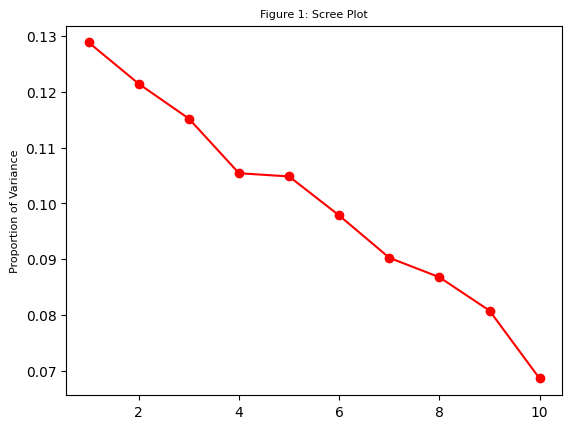

In [86]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [87]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the first eight principal components (PC1–PC8) account for 12.88% + 12.14% + 11.52% + 10.54% + 10.48% + 9.78% + 9.03% + 8.68% = **85.06% of the total variance in the data**.

We keep the first eight principal components because together they explain 84.78% of the total variance, which is well above the commonly recommended threshold of 70–80% for dimensionality reduction. Retaining these eight components ensures that the majority of meaningful information contained in the original features is preserved, while still achieving a substantial reduction in dimensionality from the full set of variables. This balance is important because keeping too few components risks losing important patterns in student performance, attendance, and assessment behaviors, whereas keeping too many would not provide the efficiency benefits that PCA is intended to deliver. By selecting eight components, the transformed dataset maintains a high level of interpretability and variance retention, allowing subsequent clustering analysis to be performed on a more compact, noise-reduced representation of the data without sacrificing essential structure.

In [88]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

In [89]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,0.855141
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,0.255126
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,-1.864242
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,0.528984
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,-0.855673


### **PCA Visualization**

In [90]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

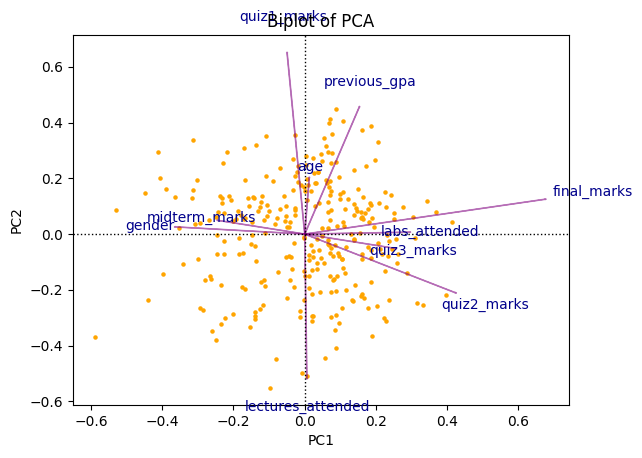

In [91]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

**1. What PC1 Represents**

PC1 represents a clear course performance and academic engagement dimension. The high end of PC1 is strongly influenced by variables such as final_marks, quiz2_marks, quiz3_marks, and labs_attended, all of which point sharply to the positive direction of the axis. This shows that students who perform well in major assessments and participate actively in lab activities tend to score high on PC1. On the low end, PC1 reflects weaker contributions from gender, midterm_marks, and a slightly negative contribution from lectures_attended, indicating that these factors either contribute minimally or are associated with lower performance. Overall, PC1 separates consistently high-performing, well-engaged students from those who display weaker or inconsistent performance across the course.

**2. What PC2 Represents**

PC2 captures a dimension of prior academic readiness and early course performance. The upper end of PC2 is shaped by strong positive loadings from quiz1_marks, previous_gpa, and age, indicating that students with stronger academic backgrounds and better early understanding of the course material tend to score high along this component. Conversely, the lower end of PC2 is defined by the more negative contributions from lectures_attended, along with slight negative influence from gender and minimal influence from midterm_marks, suggesting that students low on PC2 may have weaker early engagement or lower prior academic preparation. Thus, PC2 distinguishes students who start the course with strong foundational knowledge from those who begin with less favorable initial academic conditions.

**3. Most Important Variables for Each PC**

**PC1 (Performance & Course Engagement)**

The variables with the strongest contributions (longest arrows on PC1) are:
* final_marks (strongest positive influence)
* quiz2_marks
* previous_gpa

**PC2 (Prior GPA & Demographics)**

The variables contributing most strongly to PC2 include:
* quiz1_marks
* previous_gpa
* final_marks

## **K-Means Clustering**

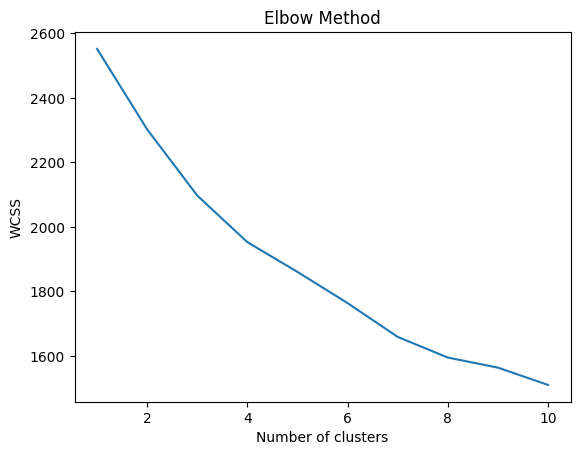

In [92]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


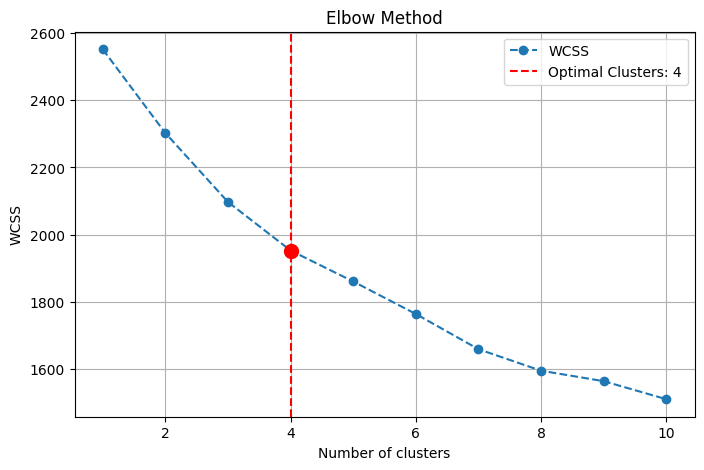

The optimal number of clusters is: 4


In [94]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [95]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [96]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10373863440575633


Based on the Elbow method, the optimal number of clusters was determined to be four, as this point shows a noticeable bend in the WCSS curve, indicating diminishing returns in variance reduction beyond this value. After fitting the K-Means model with four clusters, the resulting silhouette score was approximately 0.1037. Although this score indicates relatively weak cluster separation—suggesting that the student groups overlap and are not clearly distinct—it is still useful for identifying general patterns in student behavior and performance when combined with PCA insights.

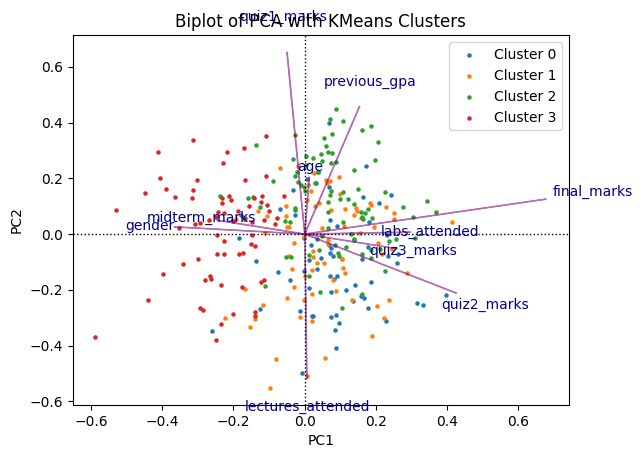

In [97]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [98]:
df.drop(columns=["assignments_submitted"], inplace=True)

In [99]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,3
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,3
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,1
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,0


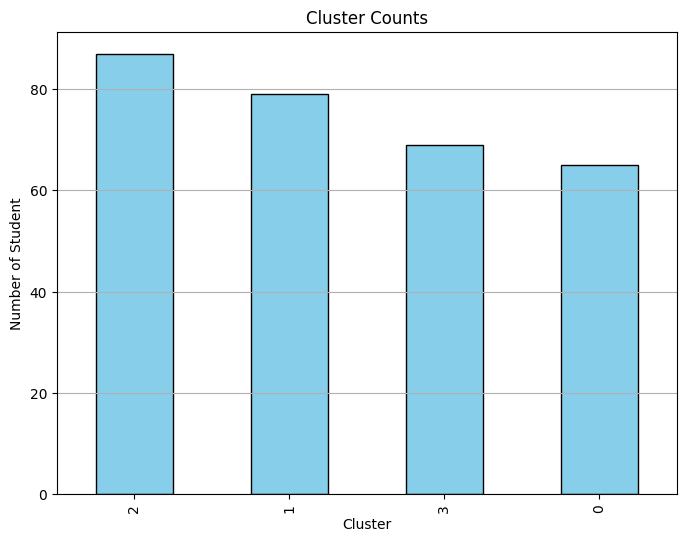

In [100]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Student')
plt.grid(axis='y')
plt.show()

## **Cluster Profiling & Educational Recommendations**

### **Cluster Profiling**

**Cluster 0 — Low readiness, mixed academic results, moderate engagement (Blue)**

Cluster 0 students appear mostly in the lower region of PC2 (indicating low academic preparedness) but are spread around the center to slightly right side of PC1, meaning their actual course performance ranges from average to slightly below average.

Profile Details:
* Age: Generally younger or average-aged students
* Previous GPA: Low
* Quiz1 Performance: Low (weak early understanding → low PC2)
* Quiz2/Quiz3: Mixed (some improving, some still low)
* Final Marks: Average to slightly below average
* Lecture Attendance: Low (negative loading on PC2)
* Lab Attendance: Moderate
* Overall Academic Performance: Consistently weak and disengaged

**Cluster 1 — Average Students With Mixed Performance, Moderate Readiness (Orange)**

Cluster 1 spreads across the center of both PC1 and PC2. These students show average quiz and final marks, moderate lab attendance, and typical previous GPAs. They are not high achievers but also not severely at-risk. Performance is inconsistent, with some strengths in certain assessments and weaknesses in others.

Profile Details:
* Age: Average
* Previous GPA: Moderate
* Quiz1 Performance: Average
* Quiz2/Quiz3: Mixed performance (some higher, some lower)
* Final Marks: Mid-range scores
* Lecture Attendance: Moderate but not high
* Lab Attendance: Mixed
* Overall Academic Performance: Unstable; average but inconsistent

**Cluster 2 — Strong background, high engagement, and top overall performance (Green)**

Cluster 2 is concentrated in the upper-right quadrant of the PCA plot—indicating both high PC1 (course performance) and high PC2 (prior academic preparedness). These students have strong final exam scores, good quiz2/quiz3 marks, higher lab attendance, and also demonstrate strong early quiz1 performance and higher previous GPAs. This group represents top-performing, well-prepared students with consistent engagement.

Profile Details:
* Age: Slightly older on average
* Previous GPA: High (strong academic foundation)
* Quiz1 Performance: Strong early quiz performance
* Quiz2/Quiz3: High scores
* Final Marks: Highest among all clusters
* Lecture Attendance: Moderate to high
* Lab Attendance: High (strong engagement)
* Overall Academic Performance: Excellent and consistent

**Cluster 3 — Weaker Performers with Low Preparedness (Red)**

Cluster 3 lies mostly in the lower-left to center region of PC2, indicating lower previous GPA, weaker initial quiz1 performance, and lower lecture attendance, but not necessarily the lowest course performance. Many are scattered toward the center of PC1, suggesting average but improving performance. They may lack academic background but show potential to catch up.

Profile Details:
* Age: Younger or average
* Previous GPA: Low to moderate
* Quiz1 Performance: Weak early performance
* Quiz2/Quiz3: Improving results
* Final Marks: Moderate (better than Cluster 0)
* Lecture Attendance: Low or inconsistent
* Lab Attendance: Moderate
* Overall Academic Performance: Developing; improvement over time

### **Interpretation via PCA biplot**

Overlaying the clusters on the PCA biplot provides a clear visual explanation of how different groups of students align with the underlying academic dimensions captured by PC1 and PC2. The right side of PC1 is dominated by strong positive loadings from final_marks, quiz2_marks, quiz3_marks, and labs_attended, meaning that this area corresponds to students who consistently perform well in major assessments and participate actively in labs. This region is heavily occupied by Cluster 2 (green), indicating that these students are the highest achievers in the course, with strong performance across multiple assessments and high engagement in course activities.

On the opposite end, the left side of PC1 corresponds to variables with low or negative loadings, such as gender, midterm_marks, and slightly negative lectures_attended. Students falling in this region—mostly Cluster 0 (blue) and Cluster 3 (red)—tend to have weaker performance across quizzes and final exams, along with inconsistent engagement. This aligns with their classification as lower-performing or developing students.

Looking at the vertical axis, the upper side of PC2 is influenced by strong positive loadings from quiz1_marks, previous_gpa, and age, indicating high early preparedness, stronger academic background, and slightly more maturity. Cluster 2 students are again concentrated in this region, suggesting that not only do they perform well throughout the course, but they also began the semester with better foundational knowledge and early quiz performance.

In contrast, the lower side of PC2 shows strong negative loading from lectures_attended, meaning this area of the plot corresponds to students with lower engagement in lectures and weaker early readiness. Cluster 0 and Cluster 3 occupy much of this lower region, consistent with their characteristics of low lecture participation, weak early performance (low quiz1), and lower previous GPA.

Cluster 1 (orange) is more dispersed around the center of both PC axes, indicating average and inconsistent performance. They do not dominate any extreme of PC1 or PC2, reflecting their mixed scores across quizzes, exams, and attendance.

**Cluster 2 (green)**: Upper-right quadrant
→ High PC1 + high PC2 = High performance + strong early readiness

**Cluster 0 (blue)**: Lower-middle region
→ Cluster 0 (blue): Low to moderate PC1 + low PC2 = Inconsistent performance + low preparedness

**Cluster 3 (red)**: Mostly left and lower-middle
→ Low PC2 (poor preparation) but some mid PC1 (developing performance)

**Cluster 1 (orange)**: Center
→ Moderate scores, mixed performers

### **Actionable Recommendations**

**Recommendation 1 — Early Diagnostic and Remedial Support for At-Risk Students (Clusters 0 & 3)**

Clusters 0 and 3 are characterized by low PC2 scores, driven by low previous GPA, weak quiz1 performance, and minimal lecture attendance. To address these early indicators of academic risk, the university should implement a structured early intervention program within the first few weeks of the semester. This should include diagnostic quizzes, targeted remedial tutoring, mandatory office hours, and early academic advising. These strategies directly address the root causes revealed in the PCA—poor initial readiness and early disengagement—helping students build a stronger foundation before falling behind.

**Recommendation 2 — Personalized Academic Coaching for Mixed-Performance Students (Cluster 1)**

Cluster 1 represents students with moderate PC1 and PC2 scores, indicating inconsistent quiz, midterm, and final exam performance. To support this group, the university should introduce personalized study roadmaps, mid-semester performance reviews, and optional skill-building workshops (e.g., exam strategies, time management, or assignment planning). These measures help stabilize their performance and push them toward higher PC1 levels by reinforcing consistent engagement and assessment readiness.

**Recommendation 3 — Honors Pathways and Leadership Opportunities for High Achievers (Cluster 2)**

Cluster 2 students score high on both PC1 and PC2, showing strong academic backgrounds and excellent in-course performance. For this group, the university should introduce honors-level project tracks, advanced research opportunities, peer mentoring programs, and leadership development activities. By leveraging their high achievement and preparedness, these students not only benefit from enrichment but can also serve as academic mentors or study group leaders for Clusters 0 and 3, creating a positive peer-learning environment.

**Recommendation 4 — Attendance-Driven Engagement Strategies Across All Clusters**

Because lecture attendance loads strongly negative on PC2, low engagement in lectures correlates with poor preparedness and early academic struggles. The university should strengthen attendance-based engagement strategies such as interactive lectures, participation points, digital check-ins, and activity-based learning sessions. Encouraging and tracking attendance can significantly improve initial readiness (PC2) and, ultimately, course performance (PC1), especially for the lower-performing clusters.

**Recommendation 5 — Lab-Focused Reinforcement Activities to Boost Overall Course Performance**

PC1 is strongly influenced by lab attendance, quiz2, quiz3, and final marks, showing that lab engagement plays a key role in course success. The university should strengthen lab-based learning by offering guided lab worksheets, practice problems, video tutorials, and lab-embedded formative assessments. Students in clusters 0 and 3 benefit the most, as these activities support both conceptual understanding and consistent performance across quizzes and exams.